<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/CNN_CNN_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
test_X.shape

(10000, 28, 28)

In [6]:
train_X = train_X.reshape(60000, 28, 28, 1)
test_X = test_X.reshape(10000, 28, 28, 1)
train_X.shape
test_X.shape

(10000, 28, 28, 1)

In [7]:
train_X = train_X.astype('float32') /255
test_X = test_X.astype('float32') /255

In [8]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 20
classes = 10
loss = losses

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))#32:số lần tích chập, (3,3):kich thuoc bo loc
model.add(LeakyReLU(alpha = 0.1)) #một dạng bộ lọc
model.add(MaxPooling2D((2, 2), padding = 'same')) #(2,2) kich thươc bo loc

In [11]:
model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same')) #khong cần kernel_size van hiểu (3,3) la bo loc
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [12]:
model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [13]:
#bo ANN de phan loai
model.add(Flatten())    #chuyen anh thanh vecto, dua qua mang ANN
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 10
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [14]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [15]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 21s 9ms/step - loss: 0.4323 - accuracy: 0.8414
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2682 - accuracy: 0.9020
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2234 - accuracy: 0.9176
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1907 - accuracy: 0.9294
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1684 - accuracy: 0.9391
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1447 - accuracy: 0.9460
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1238 - accuracy: 0.9539
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1057 - accuracy: 0.9603
Epoch 9/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0883 - accuracy: 0.9668
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0769 - accuracy: 0.971

In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/fashion_mnist_cnn.h5')

In [17]:
eval = model.evaluate(test_X, test_Y, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Test loss:  0.492138534784317
Test accuracy:  0.919700026512146


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


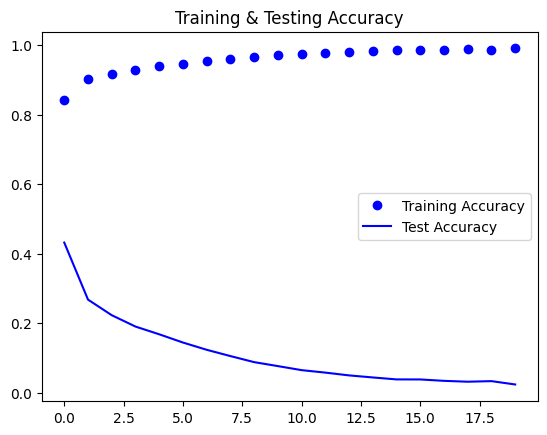

In [19]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')   # 'bo' la dau tron
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend()
plt.show()